<a href="https://colab.research.google.com/github/Aquib88raza/image-classification-ANKLE/blob/main/knnnnewdats296.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import cv2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, GlobalMaxPooling2D, Input, LeakyReLU
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
seed = 42
np.random.seed(seed)

Total number of images in the dataset: 222
Number of images in the training set: 177
Number of images in the testing set: 45
Number of images in the training set after augmentation: 177

Train file names:
1 Right AP.jpg - Train
1 Right Lateral.jpg - Train
1 Left AP.jpg - Train
1 Left Lateral.jpg - Train
3 Left AP.jpg - Train
4 Left AP.jpg - Train
4 Left Lateral.jpg - Train
4 Right AP.jpg - Train
4 Right Lateral.jpg - Train
6 Left Lateral.jpg - Train
7 Right Lateral.jpg - Train
7 Right AP.jpg - Train
12 Left AP.jpg - Train
12 Left Lateral.jpg - Train
14 Left Lateral.jpg - Train
14 Right AP.jpg - Train
18 Left AP.jpg - Train
18 Left Lateral.jpg - Train
18 Right AP.jpg - Train
CCH-B-073-2-ankle-FR1.jpg - Train
CCH-B-073-2-ankle-SR2.jpg - Train
CCH-L-032-8-ankle-FL1.jpg - Train
CCH-L-032-8-ankle-SL3.jpg - Train
CCH-M-014-8-ankleSR1.jpg - Train
CCH-M-014-8-ankle-SL2.jpg - Train
CCH-M-014-8-ankleFR1.jpg - Train
CCH-M-014-8-ankleFL1.jpg - Train
CCH-N-004-8-ankle-FL1.jpg - Train
CCH-N-004-8-an

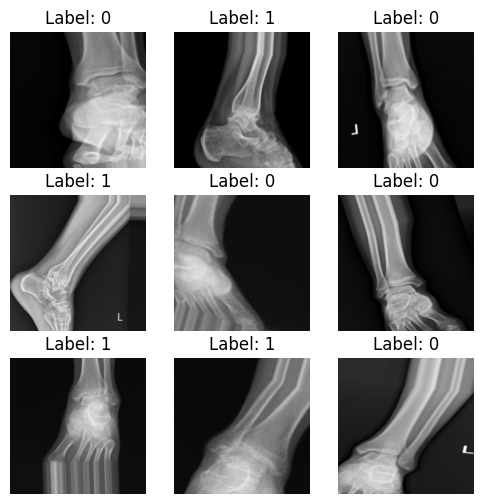

In [2]:
# Define the path to your image directories for healthy and ill samples
# Define the path to your image directories for healthy and ill samples
normal_path = "/content/drive/MyDrive/ankle with new data 2/healthy"
ill_path = "/content/drive/MyDrive/ankle with new data 2/ill"
# Create lists to store image data and labels
dataset_images = []
dataset_labels = []
dataset_file_names = []

# Reading images from the normal directory
for files in os.listdir(normal_path):
    if files.endswith(".jpg"):
        file_path = os.path.join(normal_path, files)
        image = cv2.imread(file_path)
        if image is not None and not image.size == 0:
            size = (256, 256)
            image = cv2.resize(image, size, interpolation=cv2.INTER_AREA)
            dataset_images.append(image)
            dataset_labels.append(0)
            dataset_file_names.append(files)

# Reading images from the ill directory
for files in os.listdir(ill_path):
    if files.endswith(".jpg"):
        file_path = os.path.join(ill_path, files)
        image = cv2.imread(file_path)
        if image is not None and not image.size == 0:
            size = (256, 256)
            image = cv2.resize(image, size, interpolation=cv2.INTER_AREA)
            dataset_images.append(image)
            dataset_labels.append(1)
            dataset_file_names.append(files)

# Convert the lists to NumPy arrays
dataset_images = np.array(dataset_images)
dataset_labels = np.array(dataset_labels)
dataset_file_names = np.array(dataset_file_names)

# Normalize pixel values to the range [0, 1]
dataset_images = dataset_images / 255.0

# Split the dataset into training and testing sets
seed = 42  # Corrected variable name to 'seed'
X_train, X_test, y_train, y_test = train_test_split(
    dataset_images, dataset_labels, test_size=0.2, random_state=seed
)

# Create an instance of the ImageDataGenerator for data augmentation on the training set
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Generate augmented images and labels for the training set
augmented_images = []
augmented_labels = []

for i in range(len(X_train)):
    img = X_train[i]
    label = y_train[i]
    img = img.reshape((1,) + img.shape)
    augmented = datagen.flow(img, batch_size=1)

    for _ in range(1):
        augmented_images.append(augmented.next()[0])
        augmented_labels.append(label)

# Convert the augmented data to NumPy arrays
augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

# Print the total number of images in the dataset
total_dataset_images = len(dataset_images)
print("Total number of images in the dataset:", total_dataset_images)

# Print the number of images in the training set
num_train_images = len(X_train)
print("Number of images in the training set:", num_train_images)

# Print the number of images in the testing set
num_test_images = len(X_test)
print("Number of images in the testing set:", num_test_images)

# Print the number of training images after augmentation
num_train_images_after_augmentation = len(augmented_images)
print("Number of images in the training set after augmentation:", num_train_images_after_augmentation)

# Visualize some augmented images
plt.figure(figsize=(6, 6))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[i])
    plt.axis("off")
    plt.title("Label: {}".format(augmented_labels[i]))

# Print the names and whether they belong to the training or testing set
print("\nTrain file names:")
for file_name in dataset_file_names[:num_train_images]:
    print(file_name, "- Train")

print("\nTest file names:")
for file_name in dataset_file_names[num_train_images:]:
    print(file_name, "- Test")

# Display the visualizations
plt.show()


Epoch 1/150
3/3 [==============================] - 23s 5s/step - loss: 0.8536 - accuracy: 0.5311 - val_loss: 0.7378 - val_accuracy: 0.4889
Epoch 2/150
3/3 [==============================] - 1s 235ms/step - loss: 0.8274 - accuracy: 0.5085 - val_loss: 0.7392 - val_accuracy: 0.4889
Epoch 3/150
3/3 [==============================] - 1s 310ms/step - loss: 0.7746 - accuracy: 0.5028 - val_loss: 0.6854 - val_accuracy: 0.6000
Epoch 4/150
3/3 [==============================] - 1s 312ms/step - loss: 0.7146 - accuracy: 0.5763 - val_loss: 0.6838 - val_accuracy: 0.6000
Epoch 5/150
3/3 [==============================] - 1s 442ms/step - loss: 0.6657 - accuracy: 0.6102 - val_loss: 0.6664 - val_accuracy: 0.6222
Epoch 6/150
3/3 [==============================] - 1s 332ms/step - loss: 0.6745 - accuracy: 0.6667 - val_loss: 0.6301 - val_accuracy: 0.6667
Epoch 7/150
3/3 [==============================] - 1s 341ms/step - loss: 0.5892 - accuracy: 0.6723 - val_loss: 0.6126 - val_accuracy: 0.6667
Epoch 8/150
3/3

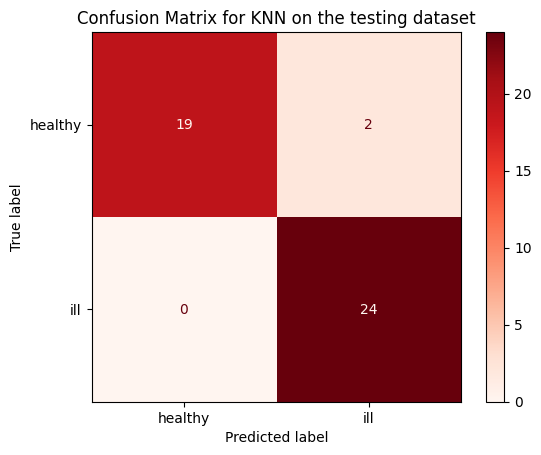

Classification Report for KNN on the training dataset:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00        87

    accuracy                           1.00       177
   macro avg       1.00      1.00      1.00       177
weighted avg       1.00      1.00      1.00       177



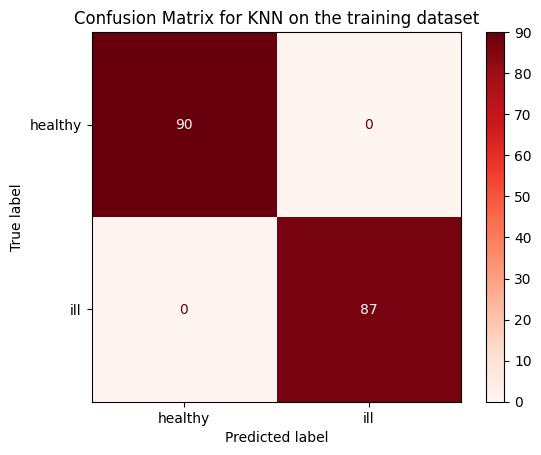

In [3]:
# Create an InceptionV3 model for feature extraction
base_model = InceptionV3(include_top=False, weights='imagenet', input_shape=(256, 256, 3))

# Add custom layers for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(112)(x)
x = LeakyReLU(alpha=0.1)(x)  # Add Leaky ReLU activation
x = Dropout(0.5)(x)  # Add Dropout layer for regularization
predictions = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze layers in the base model
for layer in base_model.layers:
    layer.trainable = False


model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model on the training dataset with early stopping
history = model.fit(X_train, y_train, epochs=150, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Extract features from the InceptionV3-based model for both training and testing datasets
X_train_features = model.predict(X_train)
X_test_features = model.predict(X_test)

# Apply Principal Component Analysis (PCA) to reduce dimensionality
# Increase the number of PCA components
n_components = min(X_train_features.shape[0], X_train_features.shape[1], 500)  # Set your desired number
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_features)
X_test_pca = pca.transform(X_test_features)

# Create the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=11, weights='uniform', algorithm='auto',)

# Train the KNN model on the training dataset with PCA features
knn_classifier.fit(X_train_pca, y_train)

# Predict on the testing dataset
y_test_pred = knn_classifier.predict(X_test_pca)

# Generate classification report for the testing dataset
test_report = classification_report(y_test, y_test_pred)
print("Classification Report for KNN on the testing dataset:\n", test_report)

# Calculate the confusion matrix for the testing dataset
test_cm = confusion_matrix(y_test, y_test_pred)

# Display the confusion matrix for the testing dataset
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=["healthy", "ill"])
test_disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion Matrix for KNN on the testing dataset")
plt.show()
# Predict on the training dataset using the best KNN classifier with PCA features
y_train_pred = knn_classifier.predict(X_train_pca)

# Generate classification report for the training dataset
train_report = classification_report(y_train, y_train_pred)
print("Classification Report for KNN on the training dataset:\n", train_report)

# Calculate the confusion matrix for the training dataset
train_cm = confusion_matrix(y_train, y_train_pred)

# Display the confusion matrix for the training dataset
train_disp = ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=["healthy", "ill"])
train_disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion Matrix for KNN on the training dataset")
plt.show()


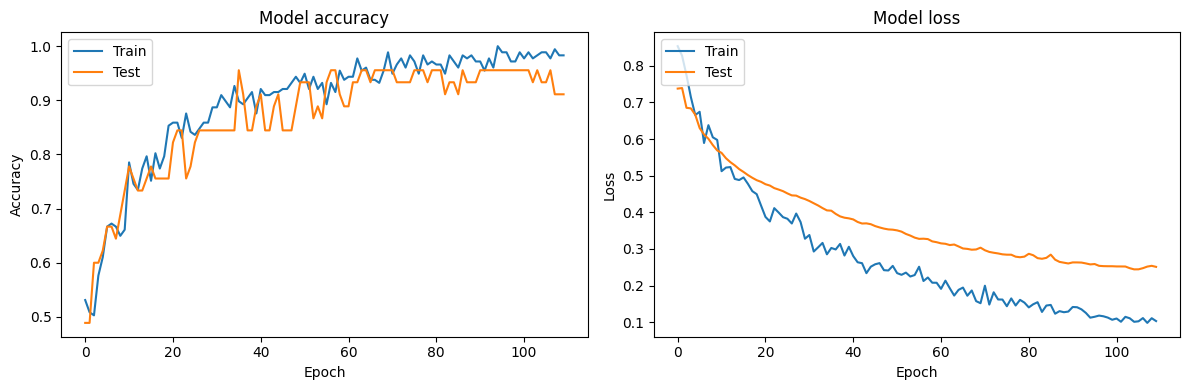

In [4]:
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

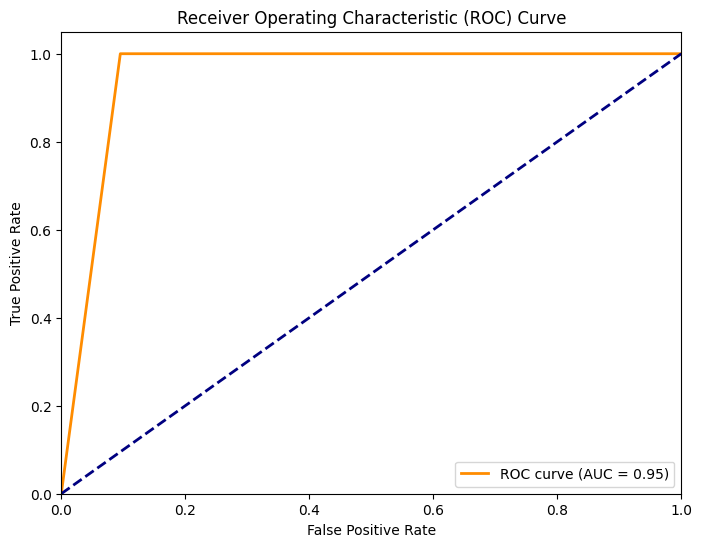

AUC (Area Under the Curve): 0.95


In [5]:

from sklearn.metrics import roc_curve, roc_auc_score, auc

# Calculate ROC curve for testing data
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

# Calculate AUC for testing data
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Display AUC value
print("AUC (Area Under the Curve): {:.2f}".format(roc_auc))


In [6]:
from sklearn.metrics import classification_report, confusion_matrix, recall_score

# Print classification report for the testing dataset with sensitivity and specificity
test_report = classification_report(y_test, y_test_pred, target_names=["healthy", "Ill"])

# Calculate confusion matrix for testing data
confusion_test = confusion_matrix(y_test, y_test_pred)
tn, fp, fn, tp = confusion_test.ravel()

# Calculate sensitivity and specificity for testing data
sensitivity_test = tp / (tp + fn)
specificity_test = tn / (tn + fp)

print("Classification Report - Testing:\n", test_report)
print("Sensitivity (True Positive Rate) - Testing:", sensitivity_test)
print("Specificity (True Negative Rate) - Testing:", specificity_test)

# Print classification report for the training dataset with sensitivity and specificity
train_report = classification_report(y_train, y_train_pred, target_names=["healthy", "Ill"])

# Calculate confusion matrix for training data
confusion_train = confusion_matrix(y_train, y_train_pred)
tn, fp, fn, tp = confusion_train.ravel()

# Calculate sensitivity and specificity for training data
sensitivity_train = tp / (tp + fn)
specificity_train = tn / (tn + fp)

print("Classification Report - Training:\n", train_report)
print("Sensitivity (True Positive Rate) - Training:", sensitivity_train)
print("Specificity (True Negative Rate) - Training:", specificity_train)


Classification Report - Testing:
               precision    recall  f1-score   support

     healthy       1.00      0.90      0.95        21
         Ill       0.92      1.00      0.96        24

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.96        45
weighted avg       0.96      0.96      0.96        45

Sensitivity (True Positive Rate) - Testing: 1.0
Specificity (True Negative Rate) - Testing: 0.9047619047619048
Classification Report - Training:
               precision    recall  f1-score   support

     healthy       1.00      1.00      1.00        90
         Ill       1.00      1.00      1.00        87

    accuracy                           1.00       177
   macro avg       1.00      1.00      1.00       177
weighted avg       1.00      1.00      1.00       177

Sensitivity (True Positive Rate) - Training: 1.0
Specificity (True Negative Rate) - Training: 1.0


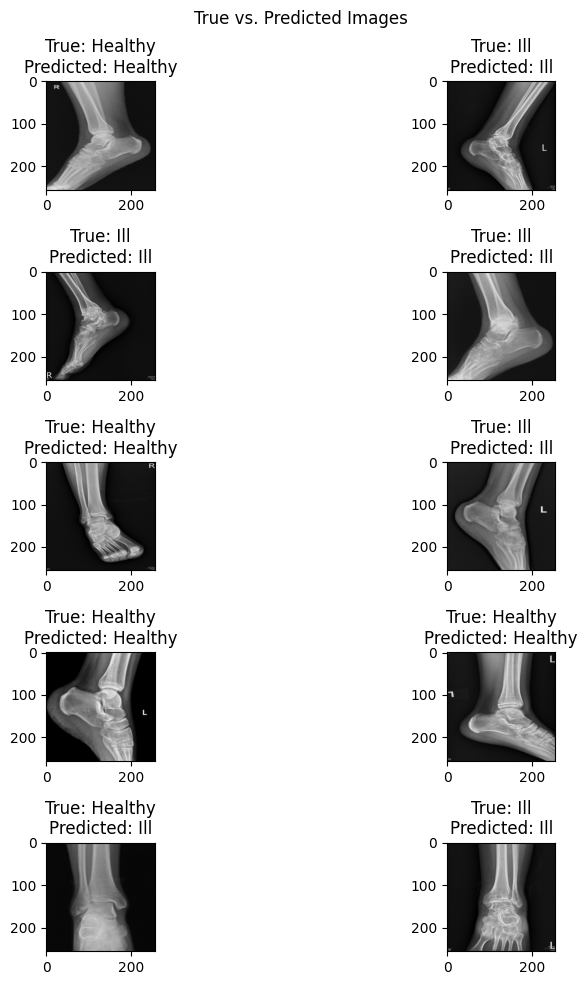

In [7]:

import random

# Randomly select some images for display (e.g., 10 images)
num_samples_to_display = 10
random_indices = random.sample(range(len(X_test)), num_samples_to_display)

# Create a figure to display the images
plt.figure(figsize=(10, 10))
plt.suptitle("True vs. Predicted Images")

# Define the number of rows and columns for image display
num_rows = 5
num_cols = 2

for i, index in enumerate(random_indices):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(X_test[index])  # Display the image
    true_label = "Healthy" if y_test[index] == 0 else "Ill"
    predicted_label = "Healthy" if y_test_pred[index] == 0 else "Ill"
    plt.title(f"True: {true_label}\nPredicted: {predicted_label}")

plt.tight_layout()
plt.show()

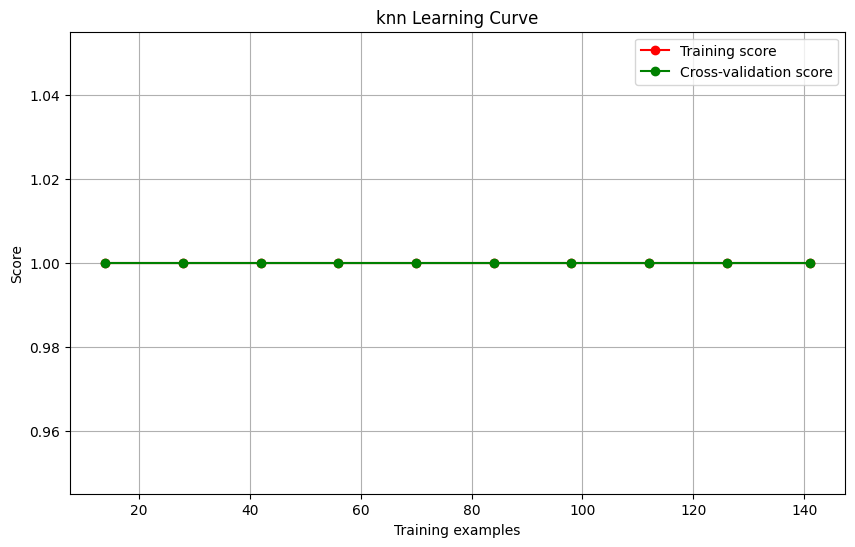

In [8]:
from sklearn.model_selection import learning_curve
# Plot the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    knn_classifier, X_train_pca, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title("knn Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1,
                 color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()